In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

In [48]:
# Reading the data
df = pd.read_csv('hospital_deaths_train.csv')
df.drop('recordid',axis=1,inplace=True)

In [49]:
X = df.drop('In-hospital_death',axis=1)
Y = df['In-hospital_death']

In [50]:
# Unique values of X
X.nunique().sum()

18336

Imputing the missing data

In [51]:
# Filling nans with KNN Imputer
impute = KNNImputer(n_neighbors=5)
x_impute = impute.fit_transform(X)

In [52]:
# the number of unique values in dataframe after imputing the missing data
pd.DataFrame(x_impute).nunique().sum() 

41501

Balancing the classes with SMOTE

In [53]:
sm = SMOTE(random_state=11)
x_sm, y_sm = sm.fit_resample(x_impute, Y)

In [65]:
# the number of unique values in dataframe after balancing classes
pd.DataFrame(x_sm).nunique().sum()


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_sm , test_size=0.2, random_state=11)

In [ ]:
# Draft
# filled_X = pd.DataFrame(x_impute)
# column_map = [ col for col in list(X.columns)]
# filled_X.set_axis(column_map, axis='columns', inplace=True)


Random Forest

In [ ]:
forest = RandomForestClassifier(n_estimators=500,random_state=11,oob_score=True,max_features='log2',min_samples_split=5)
forest.fit(X_train,y_train)
pred = forest.predict(X_test)

In [ ]:
forest.score(X_test,y_test),f1_score(y_test,pred),forest.oob_score_,accuracy_score(y_test,pred)

In [ ]:
ax = plt.axes()
df_cm = (confusion_matrix(y_test, pred, normalize="true")*100).astype(int)

sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [ ]:
# Cross validation
# params={'ccp_alpha': [0,0.1,0.5],'min_samples_split': [2,5,10], 'max_features': ['sqrt','log2']}
# choice = GridSearchCV(forest,params,cv=8).fit(X_train,y_train)
# choice.best_params_

logistic regression

In [39]:
# Scaling the data
scaler = RobustScaler()
X_scaled = scaler.fit_transform(x_sm)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_sm , test_size=0.2, random_state=11)

In [72]:
classifier = LogisticRegression(C=0.5,penalty='l1', solver='saga')
classifier.fit(X_train, y_train)

/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.5, penalty='l1', solver='saga')

In [68]:
X_train

array([[-0.38029648, -0.81885121, -0.62303082, ...,  0.36047923,
         0.06544794,  0.89305681],
       [ 0.65933447,  0.18114879, -0.31032038, ..., -1.76551121,
        -1.60121873, -1.50360016],
       [-0.99283945, -0.81885121,  0.46752216, ...,  0.40751529,
         0.06544794,  0.75161656],
       ...,
       [ 0.60987699, -0.3876122 ,  0.25976972, ...,  0.5225445 ,
         0.06544794,  0.5159969 ],
       [ 0.10601866,  0.02868868,  0.30021577, ...,  0.52894689,
        -0.03619214,  0.86694217],
       [-0.90588293,  0.18114879, 22.81058969, ..., -0.19739781,
         0.06544794,  0.5159969 ]])

In [73]:
pred = classifier.predict(X_test)

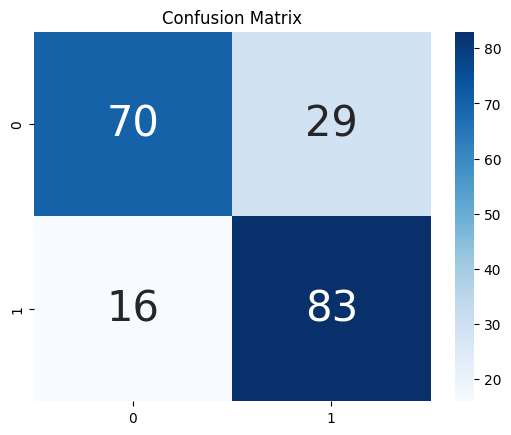

In [74]:
ax = plt.axes()
df_cm = (confusion_matrix(y_test, pred, normalize="true")*100).astype(int)

sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [71]:
params = {'C': [0.1,0.5,1,2,5],'penalty': ['l1','l2','elasticnet'],'solver': ['saga','lgfgs']}
choice = GridSearchCV(classifier,params,cv=8).fit(X_train,y_train)
choice.best_params_

/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ruben_ghazaryan/.local/lib/py

/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ruben_ghazaryan/.local/lib/py

/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'C': 0.5, 'penalty': 'l1', 'solver': 'saga'}

In [62]:
classifier.score(X_test,y_test),f1_score(y_test,pred),accuracy_score(y_test,pred)

(0.7821428571428571, 0.7829181494661922, 0.7821428571428571)

SVM

In [82]:
svm = SVC(kernel='rbf',C=6,gamma=0.02).fit(X_train,y_train)
pred = svm.predict(X_test)

In [83]:
svm.score(X_test,y_test),f1_score(y_test,pred),accuracy_score(y_test,pred)

(0.9517857142857142, 0.9507299270072993, 0.9517857142857142)

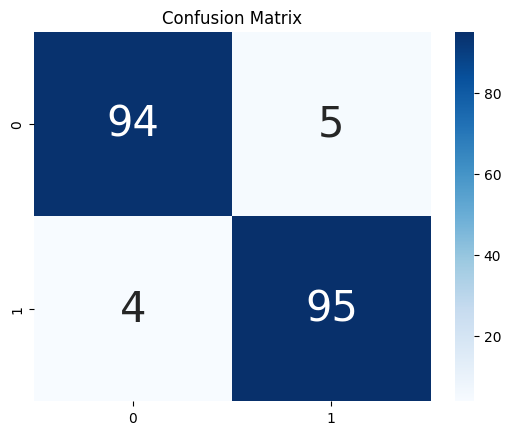

In [84]:
ax = plt.axes()
df_cm = (confusion_matrix(y_test, pred, normalize="true")*100).astype(int)

sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [81]:
params={'C': [6,7,9],'gamma': [0.02,0.05,0.09]}
choice = GridSearchCV(svm,params,cv=6).fit(X_train,y_train)
choice.best_params_

{'C': 6, 'gamma': 0.02}